<a href="https://colab.research.google.com/github/julioalexandre/-Data-Analytics-for-Lean-Six-Sigma/blob/master/Exercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercicio

Ao medir a porcentagem de cafeína do café, elaborei um boxplot e notei que havia uma grande diferença entre a porcentagem de cafeína de café produzido em três máquinas diferentes. Também descobri que a máquina 3 não estava em conformidade com o máximo de 0,1% de cafeína para o produto café descafeinado. No entanto, ao lado da máquina, também medimos o número do lote.

QUESTÃO: O lote também é um fator de influência para a porcentagem de cafeína, e se sim, qual lote é o melhor para produzir café descafeinado? 





# Importando os dados e tratando as variavéis

In [1]:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Adiquirindo o dataset
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/julioalexandre/-Data-Analytics-for-Lean-Six-Sigma/master/Datasets/caffeine3.csv


--2021-01-20 15:34:50--  https://raw.githubusercontent.com/julioalexandre/-Data-Analytics-for-Lean-Six-Sigma/master/Datasets/caffeine3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 814 [text/plain]
Saving to: ‘caffeine3.csv’

caffeine3.csv       100%[===================>]     814  --.-KB/s    in 0s      

2021-01-20 15:34:50 (15.5 MB/s) - ‘caffeine3.csv’ saved [814/814]



In [29]:
#importando o dataset
df_descafeinado = pd.read_csv("caffeine3.csv", sep=';')

In [30]:
#Verificando as 5 primeiras linhas do dataset
df_descafeinado.head()

,Caffeine%,Extractor nr.,Batch nr.
0,"0,0532",1,718
1,"0,0570",2,718
2,"0,1128",3,718
3,"0,0525",1,718
4,"0,0832",2,718


In [31]:
#verifcando as ultimas 5 linhas do dataset
df_descafeinado.tail()

,Caffeine%,Extractor nr.,Batch nr.
55,"0,0657",2,727
56,"0,1476",3,727
57,"0,0564",1,727
58,"0,0737",2,727
59,"0,1269",3,727


In [32]:
#Verificando os tipos das variaveis
df_descafeinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Caffeine%      60 non-null     object
 1   Extractor nr.  60 non-null     int64 
 2   Batch nr.      60 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [33]:
#Como o dataset continha virgulas separando as casas decimais, vamos substitui-las pelo ponto.
df_descafeinado['Caffeine%'] = df_descafeinado['Caffeine%'].str.replace(',','.')    
df_descafeinado.head()

,Caffeine%,Extractor nr.,Batch nr.
0,0.0532,1,718
1,0.0570,2,718
2,0.1128,3,718
3,0.0525,1,718
4,0.0832,2,718


In [35]:
#Convertendo a variavel Caffeine% que esta em object para float64
df_descafeinado['Caffeine%'] = df_descafeinado['Caffeine%'].astype(float64)
df_descafeinado.tail()

,Caffeine%,Extractor nr.,Batch nr.
55,0.0657,2,727
56,0.1476,3,727
57,0.0564,1,727
58,0.0737,2,727
59,0.1269,3,727


,Caffeine%,Extractor nr.,Batch nr.
0,0.0532,1,718
1,0.0570,2,718
2,0.1128,3,718
3,0.0525,1,718
4,0.0832,2,718
5,0.1170,3,718
6,0.0572,1,719
7,0.0727,2,719
8,0.1215,3,719
9,0.0379,1,719


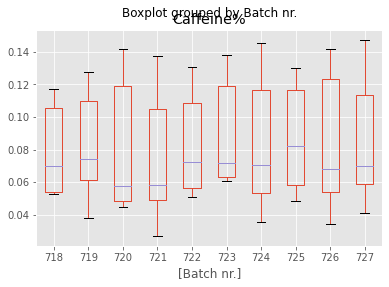

In [58]:
col = ['Caffeine%' , 'Batch nr.']
boxplot2 = df_descafeinado[col]
boxplot = boxplot2.boxplot(by='Batch nr.')

In [ ]:
 O boxplot mostrou que o lote não é um fator de influência convincente para a porcentagem de cafeína